In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

# Example 1: Swain v Alabama

Supreme Court case based (in part) on whether jury panels were representative of the population of Talladega County, Alabama. The jury panel for the case included 8 black jurors out of 100 on the panel, in a county whose population was 26% black.

In [33]:
swain = Table().with_columns(
    'Ethnicity', make_array('Black', 'Other'),
    'Eligible', make_array(0.26, 0.74),
    'Panel', make_array(0.08, 0.92)
)

swain.set_format('Eligible', PercentFormatter(0))
swain.set_format('Panel', PercentFormatter(0))

Ethnicity,Eligible,Panel
Black,26%,8%
Other,74%,92%


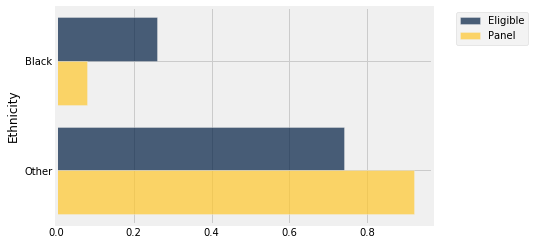

In [34]:
swain.barh('Ethnicity')

Simulate under the null to see if randomly selected panels would ever have as few as 8 black men

In [38]:
population_proportions = make_array(.26, .74)
population_proportions

array([ 0.26,  0.74])

In [39]:
sample_proportions(100, population_proportions)

array([ 0.33,  0.67])

In [48]:
def simulate_panel():
    return sample_proportions(100, population_proportions).item(0) * 100

In [49]:
simulate_panel()

23.0

## Repeated Simulation

To turn our qualitative impression into a quantitative measure of how improbable Swain's jury was, we just simulate a lot of times and store the results in an array

In [50]:
panels = make_array()

for i in np.arange(10000):
    new_panel = simulate_panel()
    panels = np.append(panels, new_panel)

In [51]:
panels

array([ 21.,  30.,  19., ...,  32.,  20.,  24.])

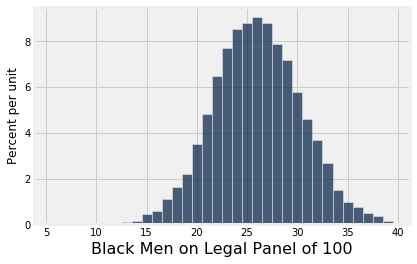

In [55]:
Table().with_column('Black Men on Legal Panel of 100', panels).hist(bins=np.arange(5.5,40.))

In [54]:
np.count_nonzero(panels <= 8) / len(panels)

0.0

# Example 2: Mendel's pea flowers

In one of his genetic experiments, Mendel bred 929 plants, of which (according to his theory) 75% should have had purple flowers. In fact, 709 (76.3%) did. Is this in line with his model?

In [56]:
709 / 929

0.7631862217438106

In [57]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

array([ 0.73412271,  0.26587729])

In [66]:
def pct_purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [67]:
pct_purple_flowers()

73.84284176533907

In [68]:
purples = make_array()

for i in np.arange(10000):
    new_purple = pct_purple_flowers()
    purples = np.append(purples, new_purple)

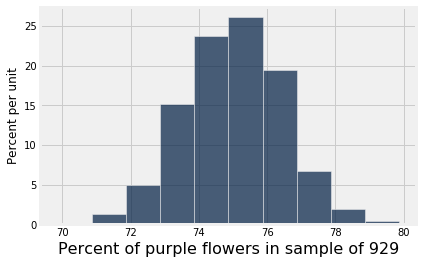

In [69]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

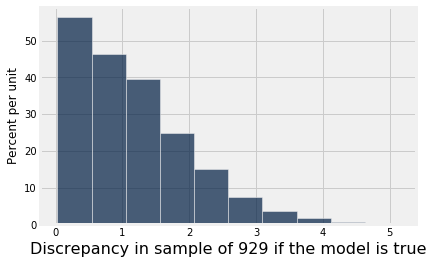

In [70]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples - 75)).hist()

In [71]:
(709 / 929 * 100 - 75)

1.318622174381062

# Example 3: Alameda County Juries

ACLU 2010 report found that of 1453 empaneled juries in Alameda County, the ethnic makeup did not match the overall ethnic makeup of eligible jurors.

In [78]:
# Data from an ACLU 2010 report
# Racial and Ethnic Disparities in Alameda County Jury Pools
# https://www.aclunc.org/sites/default/files/racial_and_ethnic_disparities_in_alameda_county_jury_pools.pdf

panels = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

panels.set_format('Eligible', PercentFormatter(0))
panels.set_format('Panels', PercentFormatter(0))

Ethnicity,Eligible,Panels
Asian,15%,26%
Black,18%,8%
Latino,12%,8%
White,54%,54%
Other,1%,4%


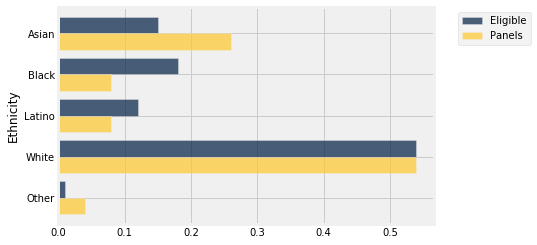

In [79]:
panels.barh('Ethnicity')

In [80]:
def total_variation_distance(distribution_1, distribution_2):
    """Each distribution is an array of proportions that sums to 1."""
    return np.abs(distribution_1 - distribution_2).sum()/2

total_variation_distance(panels.column('Eligible'), panels.column('Panels'))

0.14000000000000001

In [82]:
simulated_panel_proportions = sample_proportions(1453, panels.column('Eligible'))
simulated_panel_proportions

In [91]:
total_variation_distance(simulated_panel_proportions, panels.column('Eligible'))

0.019566414315209894

In [94]:
def simulate_panel_tvd():
    simulated_panel_proportions = sample_proportions(1453, panels.column('Eligible'))
    return(total_variation_distance(simulated_panel_proportions, panels.column('Eligible')))

In [101]:
simulate_panel_tvd()

0.020027529249827945

In [103]:
# Compute the empirical distribution of TVDs

tvds = make_array()

for i in np.arange(1000): # Repetitions
    new_tvd = simulate_panel_tvd()
    tvds = np.append(tvds, new_tvd)

results = Table().with_column('TVD between the population & a random sample', tvds)
results

TVD between the population & a random sample
0.00658637
0.0132897
0.00695114
0.00873365
0.013978
0.0173159
0.0182863
0.0124914
0.0189332
0.0298555


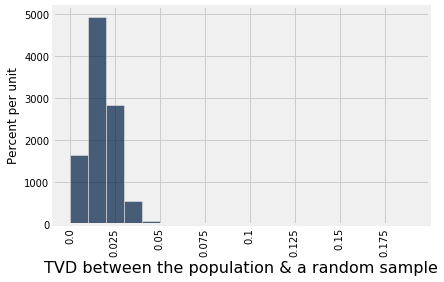

In [104]:
results.hist(bins=np.arange(0, 0.2, 0.01))